['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

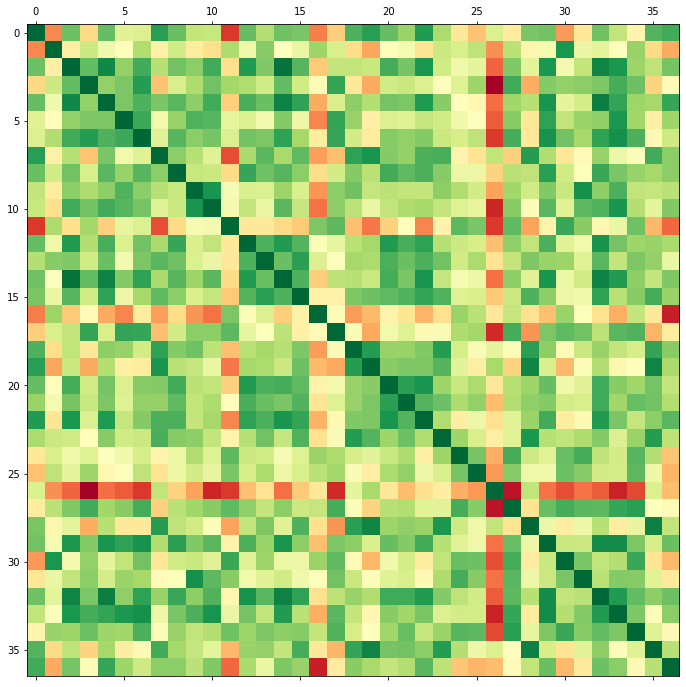

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/home/aaryan/Documents/DataSets/MinWageData.csv",encoding="UTF-8")
df=pd.read_csv("/home/aaryan/Documents/DataSets/MinWageData.csv")
act_min_wage=pd.DataFrame()
for name,group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage=group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage=act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))
min_wage_corr=act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
# print(min_wage_corr.head())        

import matplotlib.pyplot as plt
# plt.matshow(min_wage_corr)

#The plot/graph shown by this method is absolute garbage, so we need to improve that
labels=[c[:2] for c in min_wage_corr.columns]
#Sizing our plot
fig=plt.figure(figsize=(12,12))
# plt.matshow(min_wage_corr)


#  If you want to modify our graph, you can't modify plt(matplotlib) you have to modify an axis, and to have an axis
# You need to have a subplot and for a subplot you need a figure so ya its a long path     

#Now we wanna have our axes from our figure
ax=fig.add_subplot(111)
#(111) all the subplots in our figure are in a 1X1 grid and this is number one(1)
# Simply put this just means there is going to be one graph we are doing modification on
# ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn); #cmap is color of the map 

#Now we'll do some changes to our Axes
# ax.set_yticklabels(labels)
# ax.set_xticklabels(labels)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn);  

#Hey Matplotlib show all of the labels passed inside (labels) function in ax.set_xticklabels(labels)
# ax.set_xticks( np.arange(len(labels)))
# ax.set_yticks( np.arange(len(labels))) 

# ax.set_yticklabels(labels)
# ax.set_xticklabels(labels)

# ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
# plt.show()

labels


In [2]:
import requests
web=requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")
dfs=pd.read_html(web.text)
state_abbv=dfs[0]
state_abbv.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [3]:
state_abbv.to_csv("/home/aaryan/Documents/DataSets/State_abbv.csv")
state_abbv=pd.read_csv("/home/aaryan/Documents/DataSets/State_abbv.csv")
print(state_abbv.head())

   Unnamed: 0 State Name/District Postal Abbreviation Postal Code
0           0             Alabama                Ala.          AL
1           1              Alaska              Alaska          AK
2           2             Arizona               Ariz.          AZ
3           3            Arkansas                Ark.          AR
4           4          California              Calif.          CA


In [4]:
import requests
import pandas as pd
web=requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")
dfs=pd.read_html(web.text)
state_abbv=dfs[0]
state_abbv.head()
state_abbv.to_csv("/home/aaryan/Documents/DataSets/State_abbv.csv",index=False)
state_abbv=pd.read_csv("/home/aaryan/Documents/DataSets/State_abbv.csv",index_col=0)
print(state_abbv.head())

                    Postal Abbreviation Postal Code
State Name/District                                
Alabama                            Ala.          AL
Alaska                           Alaska          AK
Arizona                           Ariz.          AZ
Arkansas                           Ark.          AR
California                       Calif.          CA


In [5]:
abbv_dict=state_abbv[["Postal Code"]].to_dict()
abbv_dict=abbv_dict["Postal Code"]
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [6]:
labels=[abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Guam'

In [ ]:
import matplotlib.pyplot as plt
# plt.matshow(min_wage_corr)
min_wage_corr=act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
#The plot/graph shown by this method is absolute garbage, so we need to improve that
labels=[c[:2] for c in min_wage_corr.columns]
#Sizing our plot
fig=plt.figure(figsize=(12,12))
plt.matshow(min_wage_corr)
ax=fig.add_subplot(111)
# (111) all the subplots in our figure are in a 1X1 grid and this is number one(1)
# Simply put this just means there is going to be one graph we are doing modification on
# ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn); #cmap is color of the map 

# Now we'll do some changes to our axes
# ax.set_yticklabels(labels)
# ax.set_xticklabels(labels)
# ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn);  

# Hey Matplotlib show all of the labels passed inside (labels) function in ax.set_xticklabels(labels)
# ax.set_xticks( np.arange(len(labels)))
# ax.set_yticks( np.arange(len(labels))) 

# ax.set_yticklabels(labels)
# ax.set_xticklabels(labels)

# plt.show()


NameError: name 'act_min_wage' is not defined